$f(t)$表示$t$交易时刻的股价

$MA(t,n)$表示$t$交易时刻的股价$n$移动平均值

$MA(t,n)=\frac{1}{n}\sum_{i=t-n}^{t-1}f(i)$

若$f(t-1)<=MA(t-1,n)$且$f(t)>MA(t,n)$,则在t时刻买入

若$f(t-1)>=MA(t-1,n)$且$f(t)<MA(t,n)$,则在t时刻卖出

In [7]:
from pandas_datareader import DataReader 
from pandas import DataFrame
from datetime import datetime
all_data={}
for ticker in ['AAPL','IBM','MSFT','GOOG']:
    #若无法获取数据，请将iex改为其他股票数据提供者
    all_data[ticker]=DataReader(ticker,'iex',datetime(2015,1,1),datetime(2018,9,1))
price=DataFrame({key:all_data[key]['close'] for key in all_data.keys()})
price

5y
5y
5y
5y


,AAPL,GOOG,IBM,MSFT
date,,,,
2015-01-02,102.3192,524.81,141.0058,42.7839
2015-01-05,99.4367,513.87,138.7871,42.3859
2015-01-06,99.4461,501.96,135.7940,41.7683
2015-01-07,100.8406,501.10,134.9065,42.2990
2015-01-08,104.7151,502.68,137.8387,43.5433
2015-01-09,104.8274,496.17,138.4390,43.1773
2015-01-12,102.2444,492.55,136.1159,42.6375
2015-01-13,103.1522,496.18,136.4379,42.4133
2015-01-14,102.7591,500.87,135.5591,42.0473


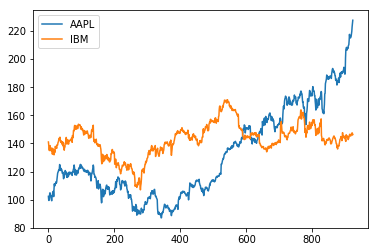

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(price["AAPL"].values,label="AAPL")
plt.plot(price["IBM"].values,label="IBM")
plt.legend()

In [15]:
def MA(t,n,f):
    ret=0
    for i in range(t-n,t):
        if i<0:
            continue
        ret+=f[i]
    return ret/n
MA(1,5,price["AAPL"].values) #交易第10天的5移动平均值

20.463839999999998

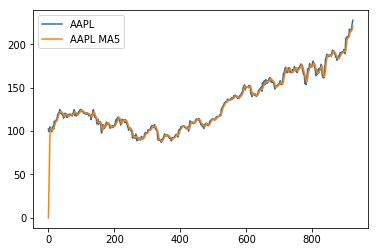

In [22]:
MA5=[]
for t in range(price["AAPL"].values.shape[0]):
    MA5.append(MA(t,5,price["AAPL"].values))
plt.plot(price["AAPL"].values,label="AAPL")
plt.plot(MA5,label="AAPL MA5")
plt.legend()

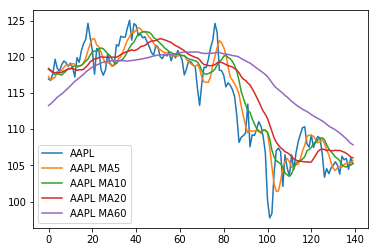

In [25]:
import numpy as np
def MAs(n,values):
    ret=[]
    for t in range(values.shape[0]):
        ret.append(MA(t,n,values))
    return np.array(ret)
MA5=MAs(5,price["AAPL"].values)
MA10=MAs(10,price["AAPL"].values)
MA20=MAs(20,price["AAPL"].values)
MA60=MAs(60,price["AAPL"].values)
plt.plot(price["AAPL"].values[60:200],label="AAPL")
plt.plot(MA5[60:200],label="AAPL MA5")
plt.plot(MA10[60:200],label="AAPL MA10")
plt.plot(MA20[60:200],label="AAPL MA20")
plt.plot(MA60[60:200],label="AAPL MA60")
plt.legend()

In [31]:
def buy_or_sell(f,ma):
    ret=[]
    for t in range(f.shape[0]):
        if f[t-1]<=ma[t-1] and f[t]>ma[t]:
            ret.append(1)
        elif f[t-1]>=ma[t-1] and f[t]<ma[t]:
            ret.append(-1)
        else:
            ret.append(0)
    return np.array(ret)
f=price["AAPL"].values
MA5=MAs(5,price["AAPL"].values)
MA10=MAs(10,price["AAPL"].values)
MA20=MAs(20,price["AAPL"].values)
choice5=buy_or_sell(f,MA5)
choice10=buy_or_sell(f,MA10)
choice20=buy_or_sell(f,MA20)

93210.42098681828


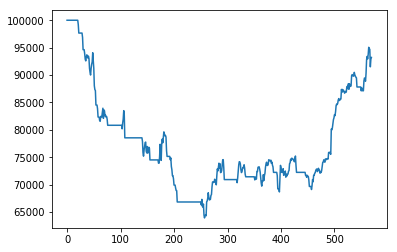

In [49]:
money=100000
stock=0
assets=[]
ratio=0.008
for t in range(30,600):
    if choice20[t]==1:
        #买入
        if money!=0:
            stock+=money*(1-ratio)/f[t]
            money=0
    elif choice20[t]==-1:
        #卖出
        if stock!=0:
            money+=stock*f[t]*(1-ratio)
            stock=0
    assets.append(money+stock*f[t])
plt.plot(assets)
print(assets[-1])

In [39]:
money=100000
money/f[30]*f[600]

125808.89570884168

5y
5y
5y
5y


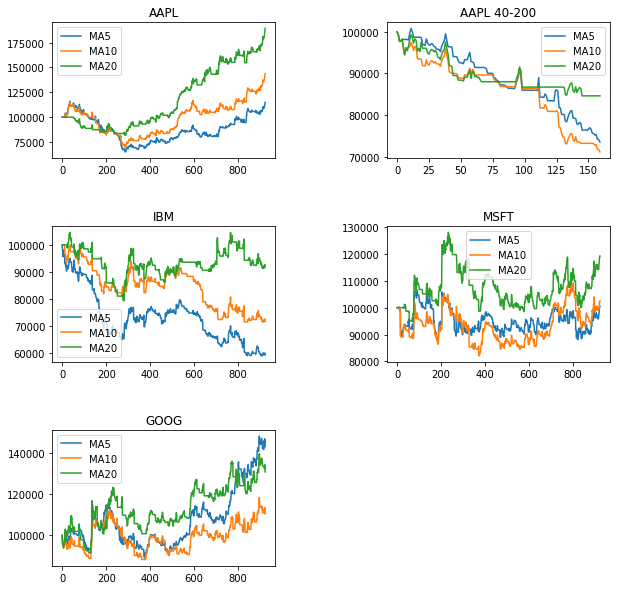

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader 
from pandas import DataFrame
from datetime import datetime
all_data={}
for ticker in ['AAPL','IBM','MSFT','GOOG']:
    #若无法获取数据，请将iex改为其他股票数据提供者
    all_data[ticker]=DataReader(ticker,'iex',datetime(2015,1,1),datetime(2018,9,1))
price=DataFrame({key:all_data[key]['close'] for key in all_data.keys()})
def moving_average(stock_price,n):
    ret = np.cumsum(stock_price, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n
def make_choice(stock_price,n):
    ma=moving_average(stock_price,n)
    ret=[]
    for t in range(stock_price.shape[0]):
        if stock_price[t-1]<=ma[t-1] and stock_price[t]>ma[t]:
            ret.append(1)
        elif stock_price[t-1]>=ma[t-1] and stock_price[t]<ma[t]:
            ret.append(-1)
        else:
            ret.append(0)
    return np.array(ret)
def simulation(stock_price,n,ratio=0.001):
    money=100000
    stock=0
    assets=[]
    choice=make_choice(stock_price,n)
    for t in range(stock_price.shape[0]):
        if choice[t]==1:
            #买入
            if money!=0:
                stock+=money*(1-ratio)/stock_price[t]
                money=0
        elif choice[t]==-1:
            #卖出
            if stock!=0:
                money+=stock*stock_price[t]*(1-ratio)
                stock=0
        assets.append(money+stock*stock_price[t])
    return assets
AAPL=price["AAPL"].values
IBM=price["IBM"].values
MSFT=price["MSFT"].values
GOOG=price["GOOG"].values
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.title("AAPL")
plt.plot(simulation(AAPL,5),label="MA5")
plt.plot(simulation(AAPL,10),label="MA10")
plt.plot(simulation(AAPL,20),label="MA20")
plt.legend()
plt.subplot(3,2,2)
plt.title("AAPL 40-200")
plt.plot(simulation(AAPL[40:200],5),label="MA5")
plt.plot(simulation(AAPL[40:200],10),label="MA10")
plt.plot(simulation(AAPL[40:200],20),label="MA20")
plt.legend()
plt.subplot(3,2,3)
plt.title("IBM")
plt.plot(simulation(IBM,5),label="MA5")
plt.plot(simulation(IBM,10),label="MA10")
plt.plot(simulation(IBM,20),label="MA20")
plt.legend()
plt.subplot(3,2,4)
plt.title("MSFT")
plt.plot(simulation(MSFT,5),label="MA5")
plt.plot(simulation(MSFT,10),label="MA10")
plt.plot(simulation(MSFT,20),label="MA20")
plt.legend()
plt.subplot(3,2,5)
plt.title("GOOG")
plt.plot(simulation(GOOG,5),label="MA5")
plt.plot(simulation(GOOG,10),label="MA10")
plt.plot(simulation(GOOG,20),label="MA20")
plt.legend()
plt.subplots_adjust(wspace=0.5, hspace=0.5)